2205.0


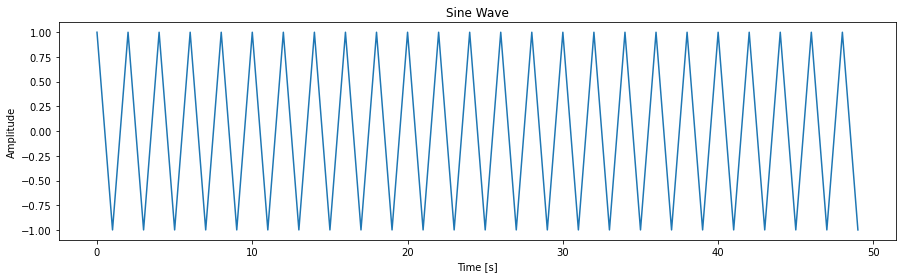

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sine_wave(sampling_rate, duration, wavelength):
    t = np.array([i for i in range(sampling_rate*duration)])
    frequency = sampling_rate / (2* wavelength)
    print(frequency)
    sine_wave = np.sin(  np.pi * frequency * t + 1.584 ) #this is 4 9s.  im happy.
    return t, sine_wave

sampling_rate = 44100  # Samples per second
duration = 10  # Duration in seconds
wavelength = 10 # Wavelength in sample units

t, sine_wave = generate_sine_wave(sampling_rate, duration, wavelength)
plt.figure(figsize=(15, 4))
plt.plot(t[:50], sine_wave[:50])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.show()

#######okay, increasing my wavelenght does something oscilaty.  it circles back.  32 and 512 are identical.it ends up hitting spaced out t
###look at 10 as well.  this is wrong

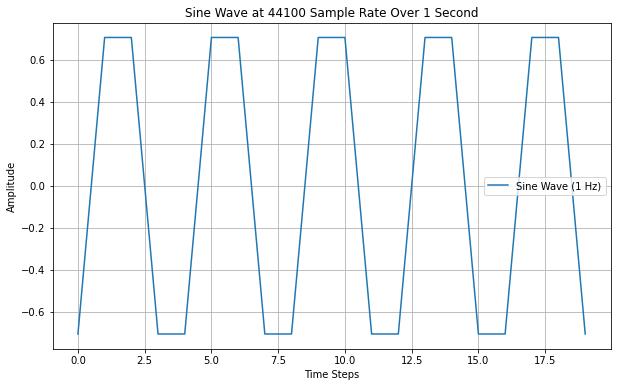

In [2]:

#####THIS WORKS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
## i might need to adjust stuff, specifically the 22050 layer, but thats it i think. 
# Define parameters
sample_rate = 44100  # Sample rate
duration = 20  # Duration in seconds
time_steps = sample_rate * duration
t = np.arange(time_steps)
theta = 0.5
frequency = 11025  # 1 Hz, meaning one full wavelength per second between 20 Hz and 20 kHz (hertz) for frequency human hearing.
y = np.sin(2 * np.pi * frequency * (t-theta )/ sample_rate) ##this does it hahahahaha, it also may not matter, if its learned.  
#what happens mathematically if you include 44100.  i think if it can learn phase it actually migth, it will, 
#it should capture distortions from higher frequencies.  make it too fast to hear, and who cares.  

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t[0:20], y[0:20], label='Sine Wave (1 Hz)')
plt.title('Sine Wave at 44100 Sample Rate Over 1 Second')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
y[0:20]

array([-0.70710678,  0.70710678,  0.70710678, -0.70710678, -0.70710678,
        0.70710678,  0.70710678, -0.70710678, -0.70710678,  0.70710678,
        0.70710678, -0.70710678, -0.70710678,  0.70710678,  0.70710678,
       -0.70710678, -0.70710678,  0.70710678,  0.70710678, -0.70710678])

In [4]:
import numpy as np

def generate_tensors(n):
    frequencies = np.array([44100 / (2 ** i) for i in range(n)])
    wavelengths = np.array([2 ** i for i in range(n)])
    return frequencies, wavelengths

# Example usage
n = 20
frequencies, wavelengths = generate_tensors(n)

frequencies, wavelengths


(array([4.41000000e+04, 2.20500000e+04, 1.10250000e+04, 5.51250000e+03,
        2.75625000e+03, 1.37812500e+03, 6.89062500e+02, 3.44531250e+02,
        1.72265625e+02, 8.61328125e+01, 4.30664062e+01, 2.15332031e+01,
        1.07666016e+01, 5.38330078e+00, 2.69165039e+00, 1.34582520e+00,
        6.72912598e-01, 3.36456299e-01, 1.68228149e-01, 8.41140747e-02]),
 array([     1,      2,      4,      8,     16,     32,     64,    128,
           256,    512,   1024,   2048,   4096,   8192,  16384,  32768,
         65536, 131072, 262144, 524288]))

In [5]:
t

array([     0,      1,      2, ..., 881997, 881998, 881999])

In [6]:
#tune every single one.  constants to make up for the limited decimals hahahaha
#Nope, scratch that.  
#tomorrow, we are learning dog.  
#A and Phi for all of them, do the phi resetting.  keep it about 0, based on the frequency, which is SET!!!!
#math tomorrow too i think.  maybe. get dog first.  

#can it generalize?

In [7]:
import torch
import torch.nn as nn

class SineWaveLayer(nn.Module):
    def __init__(self, n, sample_rate):
        super(SineWaveLayer, self).__init__()
        self.n = n
        self.sample_rate = sample_rate

        # Create frequency and wavelength tensors
        self.frequencies = torch.tensor([sample_rate / (2 ** i) for i in range(n)], dtype=torch.float32)
        self.wavelengths = torch.tensor([2 ** i for i in range(n)], dtype=torch.float32)
        
        # Initialize Amplitude with normal distribution between 0 and 1
        self.amplitudes = nn.Parameter(torch.randn(n))
        
        # Initialize Phi with normal distribution between 0 and corresponding wavelength
        self.phi = nn.Parameter(torch.abs(torch.randn(n)) % self.wavelengths)

    def forward(self, t):
          # Shape: (1, time_steps)

        # Expand frequencies and phi to match the shape of t
        frequencies = self.frequencies.unsqueeze(1)  # Shape: (n, 1)
        phi = self.phi.unsqueeze(1)  # Shape: (n, 1)
        amplitudes = self.amplitudes.unsqueeze(1)  # Shape: (n, 1)

        # Compute the sine waves and sum them
        waves = amplitudes * torch.sin(2 * torch.pi * frequencies * (t - phi) / self.sample_rate)  # Shape: (n, time_steps)
        #print(waves.shape)
        y = waves.sum(dim=0)  # Sum over all waves, shape: (time_steps,)
        #print(y.shape) this is right 
        return y
    
    def phi_center(self):
        with torch.no_grad():
            self.phi[self.phi > self.wavelengths] = 0
            self.phi[self.phi < 0] = self.wavelengths[self.phi < 0]

# Example usage
n = 10
sample_rate = 44100
layer = SineWaveLayer(n, sample_rate)

# Example duration
duration = 71571  # Duration in seconds This is the only dif, use

# Generate the output wave
output_wave = layer(torch.tensor([1,2,3,4,5,6,7]))
print(output_wave)

# Center the phi parameters
layer.phi_center()
print(layer.phi)


tensor([-1.0797,  0.3931, -0.0275,  1.0541,  0.2178,  1.0203, -0.0272],
       grad_fn=<SumBackward1>)
Parameter containing:
tensor([0.3688, 0.9003, 1.3391, 1.7724, 1.1442, 0.4974, 0.2858, 0.0335, 0.7248,
        1.6941], requires_grad=True)


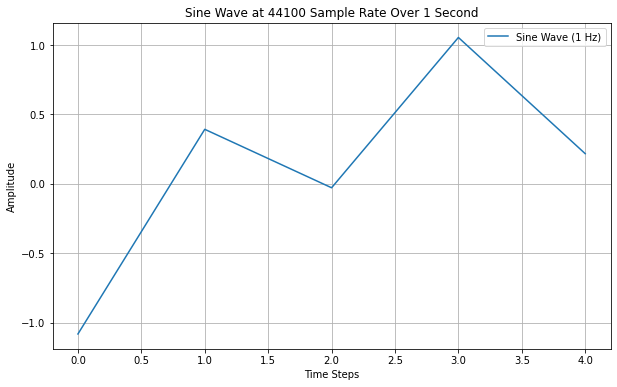

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(t[0:5], output_wave.detach().numpy().flatten()[0:5], label='Sine Wave (1 Hz)')
plt.title('Sine Wave at 44100 Sample Rate Over 1 Second')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
layer.frequencies

tensor([44100.0000, 22050.0000, 11025.0000,  5512.5000,  2756.2500,  1378.1250,
          689.0625,   344.5312,   172.2656,    86.1328])

In [10]:
layer.wavelengths

tensor([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

In [11]:
layer.amplitudes

Parameter containing:
tensor([ 0.7472, -1.4238,  0.0487,  0.3698, -0.0582,  1.6766,  0.4436, -1.3702,
        -0.3318, -1.2786], requires_grad=True)

In [12]:
layer.phi

Parameter containing:
tensor([0.3688, 0.9003, 1.3391, 1.7724, 1.1442, 0.4974, 0.2858, 0.0335, 0.7248,
        1.6941], requires_grad=True)

In [13]:
## averages stereo to make mono
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Read the .wav file
sample_rate, data = wavfile.read('dog_bark.wav')

# Check if the audio is stereo
if data.ndim == 2:
    # Average the two channels to get a mono signal
    data = data.mean(axis=1)

data = torch.from_numpy(data)

In [17]:
waveform = data

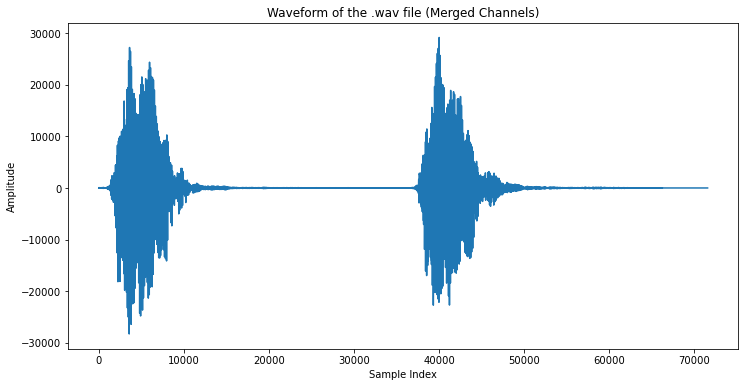

In [18]:
# Convert the numpy array to a PyTorch tensor
#waveform = torch.from_numpy(data).float()
sample_rate = 44100  # Sample rate
duration = 20  # Duration in seconds
time_steps = sample_rate * duration
t = np.arange(time_steps)
# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(waveform.numpy())
plt.title('Waveform of the .wav file (Merged Channels)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

In [21]:
t.shape

(882000,)

In [19]:
time_steps = waveform.shape[0]
time_steps

71571

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class WaveformDataset(Dataset):
    def __init__(self, wav_data):
        self.wav_data = wav_data
        self.time_steps = np.arange(waveform.shape[0])
        self.length = len(wav_data)

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        return self.wav_data[idx], self.time_steps[idx]

class RandomBatchSampler(torch.utils.data.Sampler):
    def __init__(self, data_source, batch_size):
        self.data_source = data_source
        self.batch_size = batch_size

    def __iter__(self):
        indices = torch.randperm(len(self.data_source)).tolist()
        for i in range(0, len(indices), self.batch_size):
            yield indices[i:i + self.batch_size]

    def __len__(self):
        return len(self.data_source) // self.batch_size

hyperparameters = {
    'learning_rate': 1.0,
    'epochs': 100,
    'batch_size': 10000,
}
    


In [21]:
waveform[40173]

tensor(11852.)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

class SineWaveLayer(nn.Module):
    def __init__(self, n, sample_rate):
        super(SineWaveLayer, self).__init__()
        self.n = n
        self.sample_rate = sample_rate

        # Create frequency and wavelength tensors
        self.frequencies = torch.tensor([sample_rate / (2 ** i) for i in range(n)], dtype=torch.float32)
        self.wavelengths = torch.tensor([2 ** i for i in range(n)], dtype=torch.float32)
        
        # Initialize Amplitude with normal distribution between 0 and 1
        self.amplitudes = nn.Parameter(torch.randn(n).clamp(0, 1))
        
        # Initialize Phi with normal distribution between 0 and corresponding wavelength
        self.phi = nn.Parameter(torch.abs(torch.randn(n)) % self.wavelengths)

    def forward(self, t):
        
        # Expand frequencies and phi to match the shape of t
        frequencies = self.frequencies.unsqueeze(1)  # Shape: (n, 1)
        phi = self.phi.unsqueeze(1)  # Shape: (n, 1)
        amplitudes = self.amplitudes.unsqueeze(1)  # Shape: (n, 1)

        # Compute the sine waves and sum them
        waves = amplitudes * torch.sin(2 * torch.pi * frequencies * (t + phi) / self.sample_rate)  # Shape: (n, time_steps)
        y = waves.sum(dim=0)  # Sum over all waves, shape: (time_steps,)

        return y
    
    def phi_center(self):
        with torch.no_grad():
            self.phi[self.phi > 0] = self.wavelengths[self.phi > 0] + self.phi[self.phi > 0]
            self.phi[self.phi < 0] = self.wavelengths[self.phi < 0] + self.phi[self.phi < 0]

# Example usage
n = 50
sample_rate = 44100
network = SineWaveLayer(n, sample_rate)

# Set the layer to training mode
network.train()

# Define a dummy target for loss calculation
duration = 1  # Duration in seconds
##target = torch.zeros(int(sample_rate * duration))

# Define a loss function and optimizer
hyperparameters = {'learning_rate': 0.00001
                   , 'epochs': 100
                   ,'batch_size': 1000}

# Create the dataloader with the custom random batch sampler
dataset = WaveformDataset(waveform)
batch_size = hyperparameters['batch_size']
sampler = RandomBatchSampler(dataset, batch_size)
dataloader = DataLoader(dataset, batch_sampler=sampler)

criterion = nn.MSELoss()
optimizer = optim.Adam([network.amplitudes, network.phi], lr=hyperparameters['learning_rate'])

# Create objects to hold gradients
amplitude_grads = []
phi_grads = []


# Training loop
for epoch in range(hyperparameters['epochs']):
    running_loss = 0.0
    for i, (batch_wav, batch_time) in enumerate(dataloader):
    
    
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        output = network(batch_time)

        # Calculate loss
        loss = criterion(output, batch_wav)

        # Backward pass and optimize
        loss.backward()

        # Print gradients before optimization step
        #print(f"Epoch {epoch} - Gradients for amplitudes before step:", network.amplitudes.grad[0])
        #print(f"Epoch {epoch} - Gradients for phi before step:", network.phi.grad)
        
        ##adjust grad if you wanna.
        network.phi.grad -= network.phi.grad
        #network.amplitudes.grad /= network.frequencies
        
        
        # Append gradients to the lists
        amplitude_grads.append(network.amplitudes.grad.detach().cpu().numpy().copy())
        phi_grads.append(network.phi.grad.detach().cpu().numpy().copy())
        
        
        optimizer.step()


        # Apply phi_center adjustment
        #network.phi_center()

        # Print statistics
        running_loss += loss.item()
    print(f"Epoch {epoch} - Running Loss: {running_loss}")

print('Finished Training')


NameError: name 'WaveformDataset' is not defined

In [105]:
import matplotlib.pyplot as plt

def plot_gradients_over_time(gradients, title, id = 0):
    gradients = np.array(gradients)
    num_params = 1 # gradients.shape[1]
    plt.figure(figsize=(12, 6))
    for i in range(num_params):
        plt.plot(gradients[:, id], label=f'Param {i}')
    plt.title(title)
    plt.xlabel('Step')
    plt.ylabel('Gradient Value')
    plt.legend()
    plt.show()


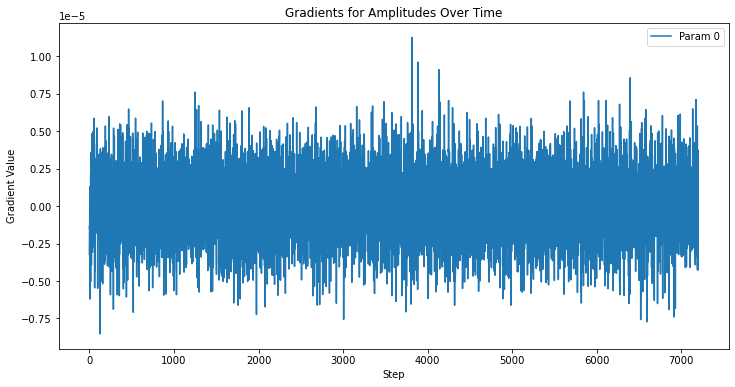

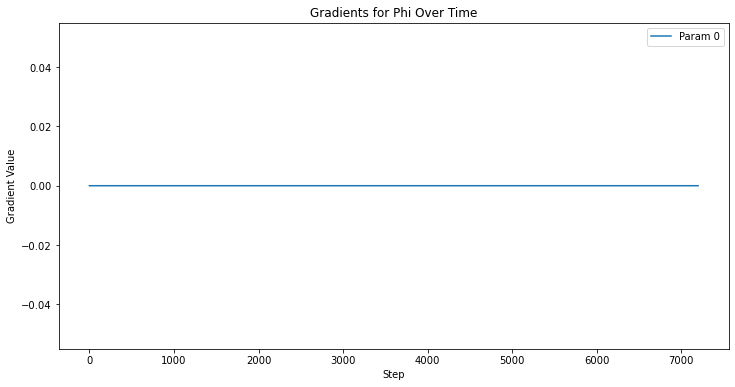

In [121]:
# Plot gradients
param_idx = -6
plot_gradients_over_time(amplitude_grads, "Gradients for Amplitudes Over Time",param_idx)
plot_gradients_over_time(phi_grads, "Gradients for Phi Over Time",param_idx)


In [ ]:
axis agreement for phase, and mse for A? try it tomorrow.